# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, scale

import warnings
warnings.filterwarnings('ignore')

sns.set()

# Loading dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/AbhishekBiswas-github/Python_Data_Science/refs/heads/main/Deep%20Learning/Student%20Mental%20Health%20Project/mental_health_social_media_dataset.csv')
dataset = dataset.drop(dataset.columns[[0, 2]], axis=1)

# Information of the dataset

In [3]:
dataset.head()

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,35,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,24,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,26,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,66,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,31,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5000 non-null   int64  
 1   gender                       5000 non-null   object 
 2   platform                     5000 non-null   object 
 3   daily_screen_time_min        5000 non-null   int64  
 4   social_media_time_min        5000 non-null   int64  
 5   negative_interactions_count  5000 non-null   int64  
 6   positive_interactions_count  5000 non-null   int64  
 7   sleep_hours                  5000 non-null   float64
 8   physical_activity_min        5000 non-null   int64  
 9   anxiety_level                5000 non-null   int64  
 10  stress_level                 5000 non-null   int64  
 11  mood_level                   5000 non-null   int64  
 12  mental_state                 5000 non-null   object 
dtypes: float64(1), int

In [5]:
numerical_columns = dataset.select_dtypes(include=['int64']).columns
for num_col in numerical_columns:
    print(f'Column: {num_col}')
    print(dataset[num_col].describe())
    print('*'*20, '\n')

Column: age
count    5000.000000
mean       29.947800
std        12.279936
min        13.000000
25%        21.000000
50%        27.000000
75%        35.250000
max        69.000000
Name: age, dtype: float64
******************** 

Column: daily_screen_time_min
count    5000.000000
mean      373.058200
std       106.003916
min       140.000000
25%       310.000000
50%       388.000000
75%       461.000000
max       520.000000
Name: daily_screen_time_min, dtype: float64
******************** 

Column: social_media_time_min
count    5000.000000
mean      175.331600
std        71.209329
min        35.000000
25%       118.000000
50%       170.000000
75%       231.000000
max       338.000000
Name: social_media_time_min, dtype: float64
******************** 

Column: negative_interactions_count
count    5000.000000
mean        0.864200
std         0.555176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: negative_interactions_count, dt

In [6]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(dataset[col].value_counts())
    print('*' * 20)

gender
Female    2474
Male      2427
Other       99
Name: count, dtype: int64
********************
platform
Facebook     744
TikTok       723
YouTube      716
WhatsApp     710
Snapchat     705
Instagram    703
Twitter      699
Name: count, dtype: int64
********************
mental_state
Stressed    4601
Healthy      341
At_Risk       58
Name: count, dtype: int64
********************


# Dataset Visualization

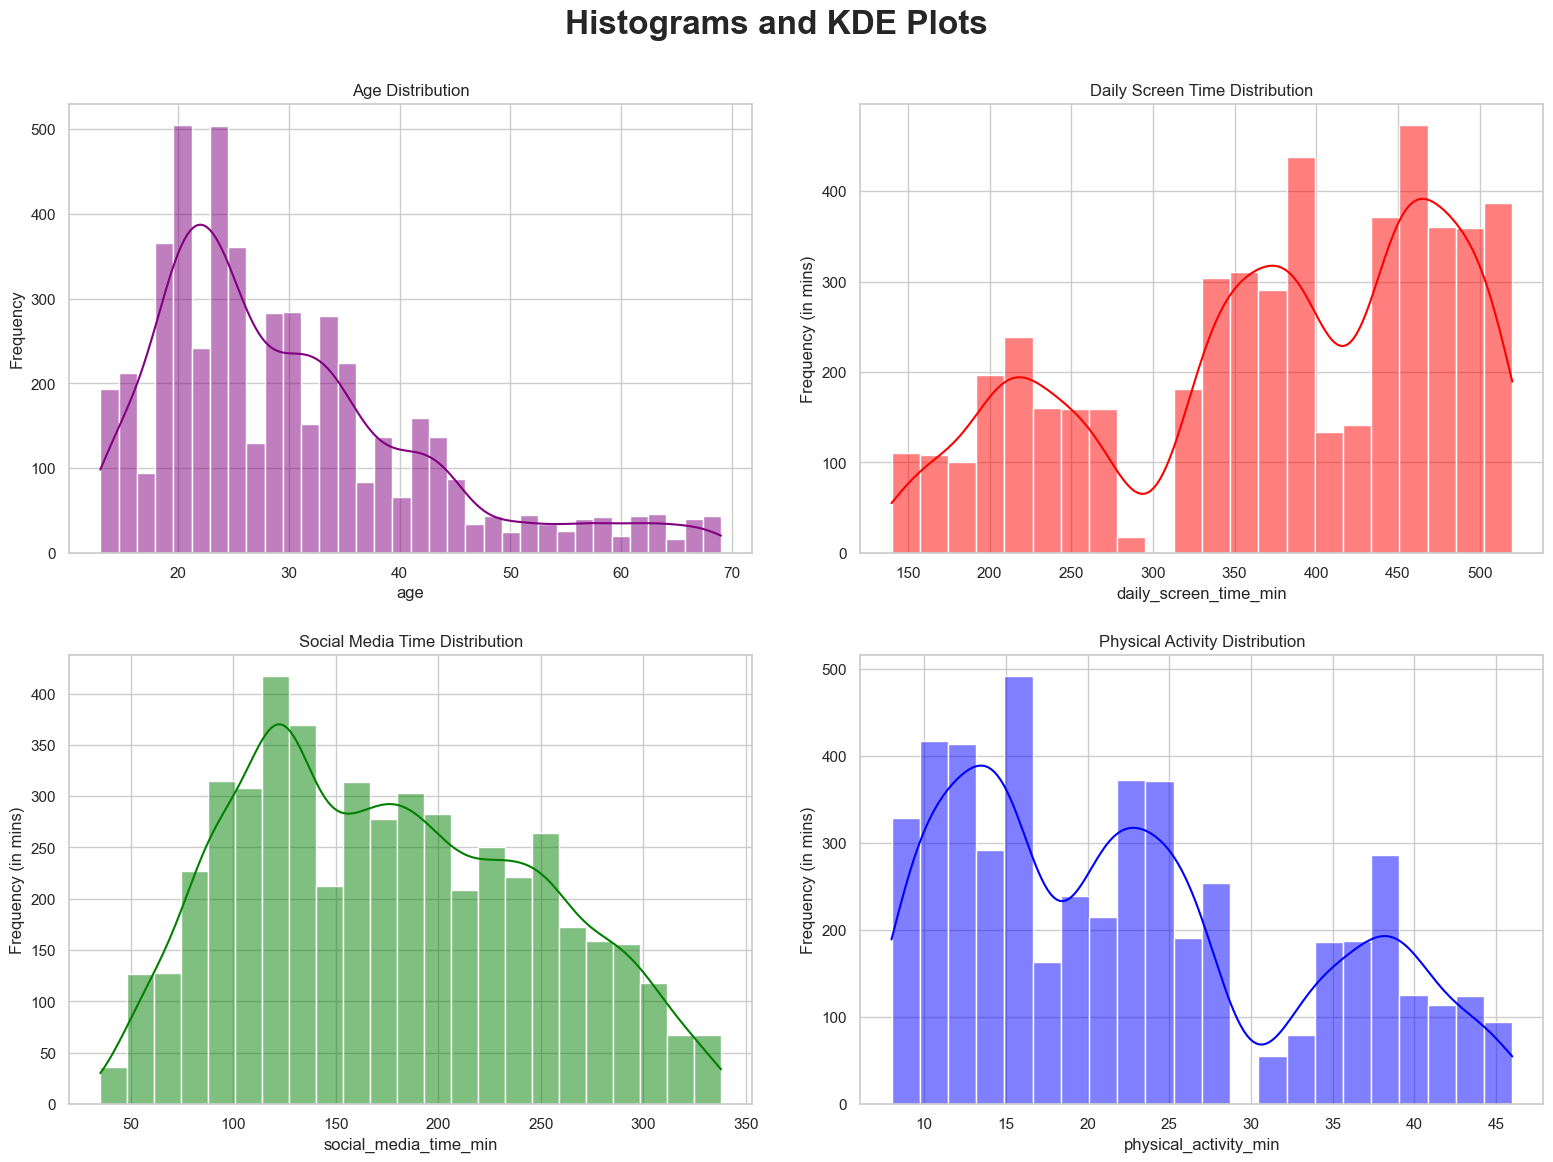

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize = (16,12))


plt.subplot(2,2,1)
sns.histplot(dataset['age'], kde=True, color = 'Purple')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution')


plt.subplot(2,2,2)
sns.histplot(dataset['daily_screen_time_min'], kde=True, color = 'Red')
plt.xlabel('daily_screen_time_min')
plt.ylabel('Frequency (in mins)')
plt.title('Daily Screen Time Distribution')


plt.subplot(2,2,3)
sns.histplot(dataset['social_media_time_min'], kde=True, color = 'Green')
plt.xlabel('social_media_time_min')
plt.ylabel('Frequency (in mins)')
plt.title('Social Media Time Distribution')


plt.subplot(2,2,4)
sns.histplot(dataset['physical_activity_min'], kde=True, color = 'Blue')
plt.xlabel('physical_activity_min')
plt.ylabel('Frequency (in mins)')
plt.title('Physical Activity Distribution')


plt.suptitle("Histograms and KDE Plots", fontsize=24, fontweight='bold')
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.5)
plt.show()

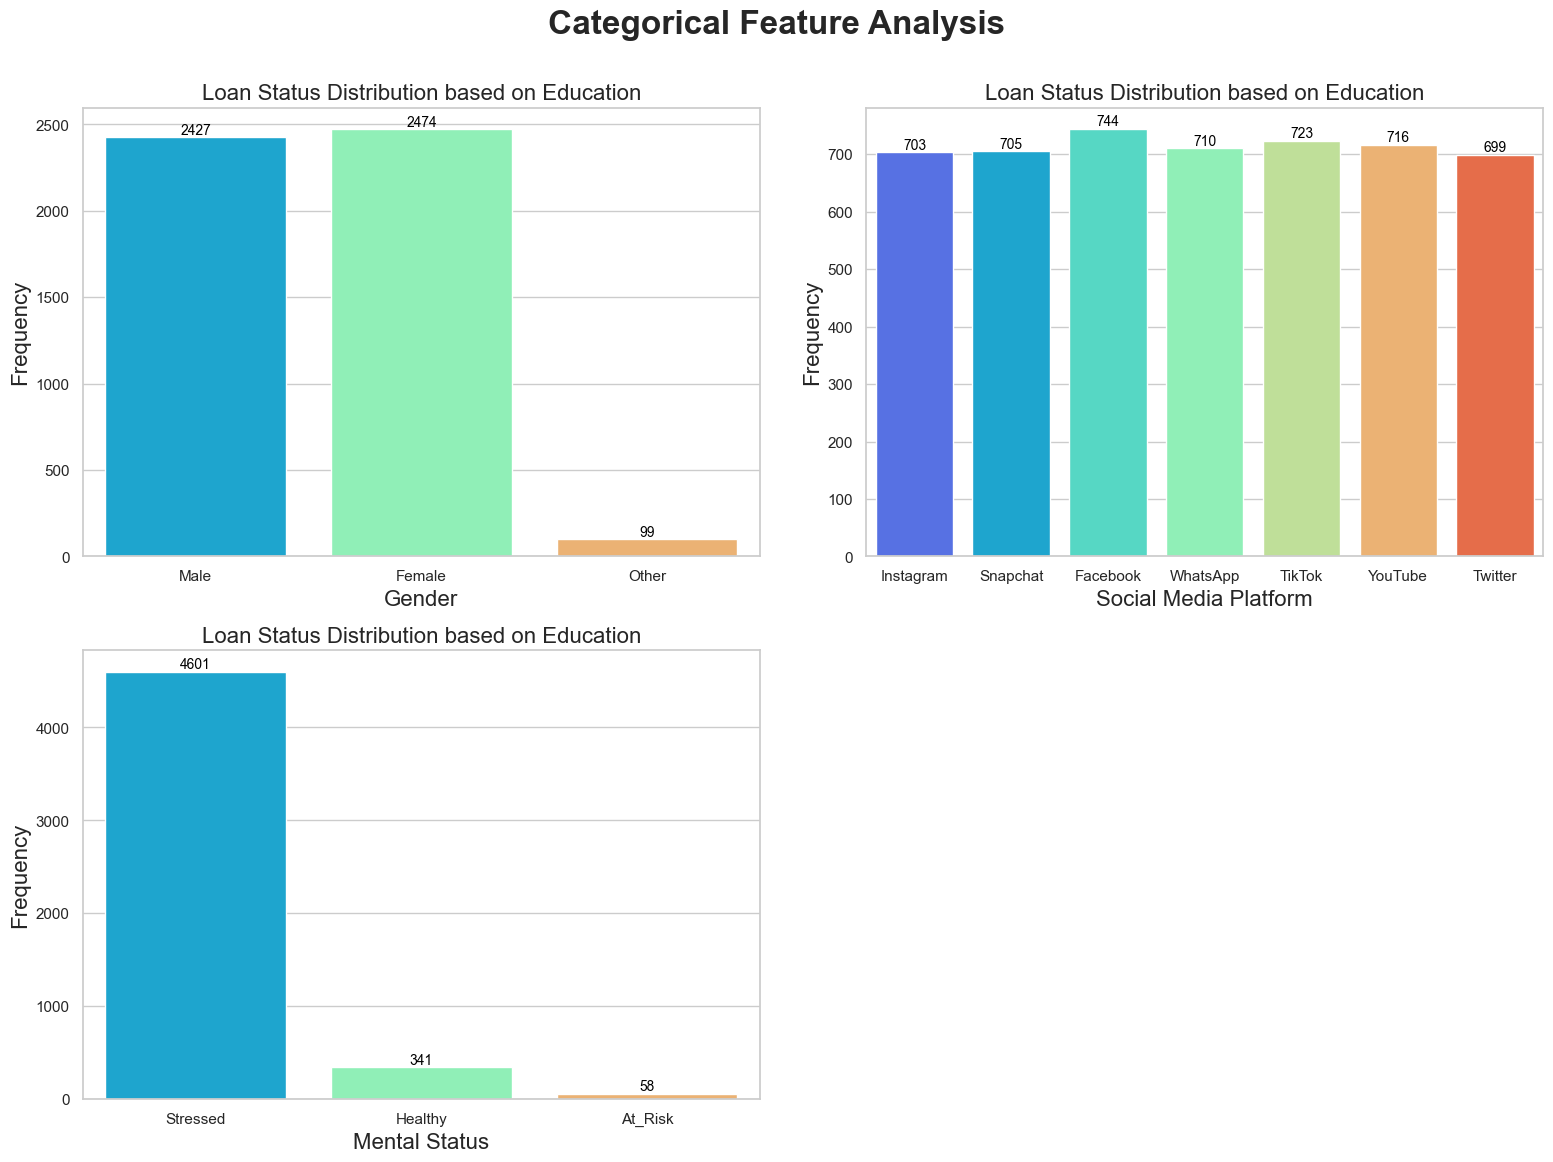

In [8]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
ax = sns.countplot(data=dataset, x='gender', hue='gender', palette='rainbow')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
# ax.legend_.remove()
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Loan Status Distribution based on Education', fontsize=16)


plt.subplot(2,2,2)
ax = sns.countplot(data=dataset, x='platform', hue='platform', palette='rainbow')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
# ax.legend_.remove()
plt.xlabel('Social Media Platform', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Loan Status Distribution based on Education', fontsize=16)

plt.subplot(2,2,3)
ax = sns.countplot(data=dataset, x='mental_state', hue='mental_state', palette='rainbow')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
# ax.legend_.remove()
plt.xlabel('Mental Status', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Loan Status Distribution based on Education', fontsize=16)

plt.suptitle('Categorical Feature Analysis', fontsize=24, fontweight='bold')
plt.tight_layout(pad=2.0, h_pad=1, w_pad=2.5)
plt.show()

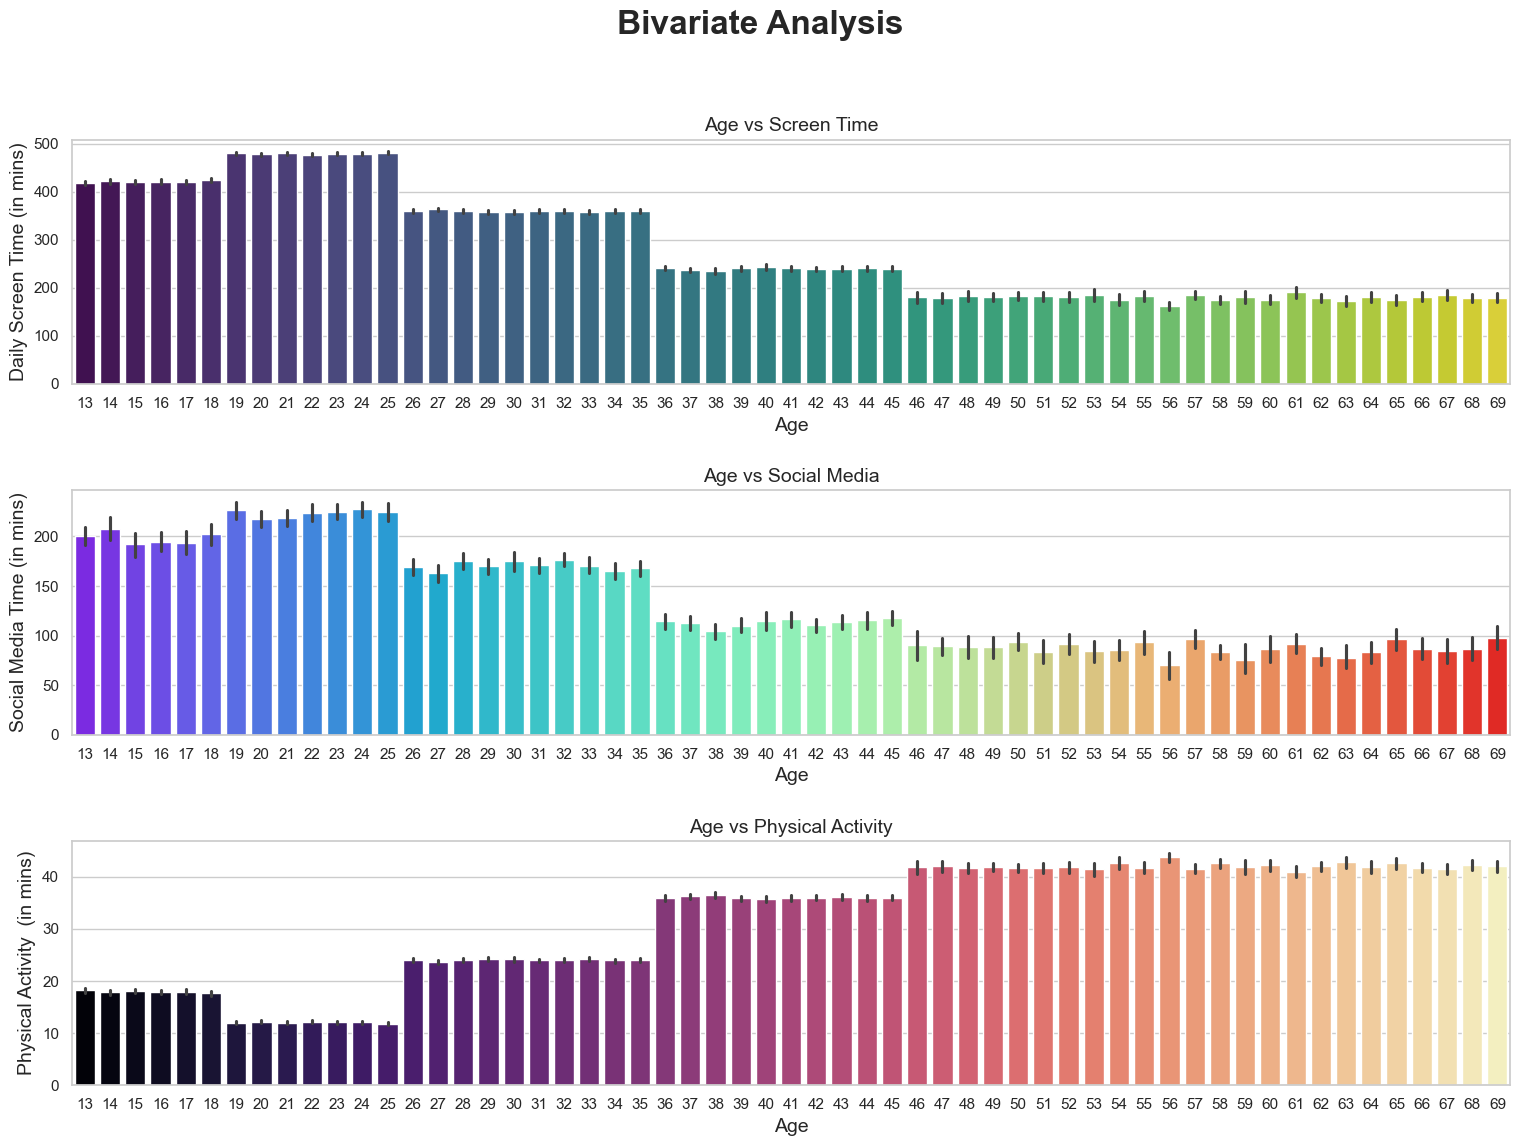

In [9]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,12))

plt.subplot(3,1,1)
sns.barplot(data=dataset, x='age', y='daily_screen_time_min', palette='viridis')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Daily Screen Time (in mins)', fontsize=14)
plt.title('Age vs Screen Time', fontsize=14)

plt.subplot(3,1,2)
sns.barplot(data=dataset, x='age', y='social_media_time_min', palette='rainbow')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Social Media Time (in mins)', fontsize=14)
plt.title('Age vs Social Media', fontsize=14)

plt.subplot(3,1,3)
sns.barplot(data=dataset, x='age', y='physical_activity_min', palette='magma')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Physical Activity  (in mins)', fontsize=14)
plt.title('Age vs Physical Activity', fontsize=14)

plt.suptitle('Bivariate Analysis', fontsize=24, fontweight='bold')
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.5)
plt.show()

# Encoding Categorical Values

In [10]:
oe = OrdinalEncoder(categories=[['Female', 'Male', 'Other']])
dataset['gender'] = oe.fit_transform(dataset[['gender']])

oe = OrdinalEncoder(categories=[['Healthy', 'Stressed', 'At_Risk']])
dataset['mental_state'] = oe.fit_transform(dataset[['mental_state']])

dataset.head(15)

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,35,1.0,Instagram,320,160,1,2,7.4,28,2,7,6,1.0
1,24,0.0,Instagram,453,226,1,3,6.7,15,3,8,5,1.0
2,26,1.0,Snapchat,357,196,1,2,7.2,24,3,7,6,1.0
3,66,0.0,Snapchat,190,105,0,1,8.0,41,2,6,6,1.0
4,31,1.0,Snapchat,383,211,1,2,7.1,22,3,7,6,1.0
5,25,0.0,Snapchat,516,284,1,3,6.4,8,3,8,5,1.0
6,29,2.0,Snapchat,328,180,1,2,7.4,27,3,7,6,1.0
7,28,0.0,Facebook,394,138,1,1,7.0,21,2,7,6,1.0
8,31,1.0,Facebook,326,114,0,1,7.4,27,2,6,6,1.0
9,26,0.0,Facebook,339,119,0,1,7.3,26,2,6,6,1.0


# Correlation of 'mental_state' with other parameters

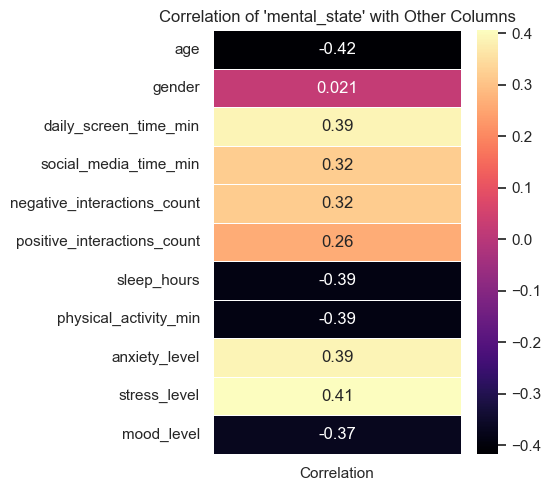

In [11]:
target_col = "mental_state"  # column to compare

dataset = dataset.drop('platform', axis = 1)
# Calculate correlations of the target column with all other columns
corr_series = dataset.corr()[target_col].drop(target_col)

# Convert to DataFrame for heatmap
corr_df = corr_series.to_frame(name='Correlation')

plt.figure(figsize=(4, len(corr_df) * 0.5))
sns.heatmap(corr_df, annot=True, cmap='magma', linewidths=.5)
plt.title(f"Correlation of '{target_col}' with Other Columns")
plt.show()


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5000 non-null   int64  
 1   gender                       5000 non-null   float64
 2   daily_screen_time_min        5000 non-null   int64  
 3   social_media_time_min        5000 non-null   int64  
 4   negative_interactions_count  5000 non-null   int64  
 5   positive_interactions_count  5000 non-null   int64  
 6   sleep_hours                  5000 non-null   float64
 7   physical_activity_min        5000 non-null   int64  
 8   anxiety_level                5000 non-null   int64  
 9   stress_level                 5000 non-null   int64  
 10  mood_level                   5000 non-null   int64  
 11  mental_state                 5000 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 468.9 KB


# Creating Training, Validation and Testing Dataset

In [13]:
print('Used Columns:\n')
print(dataset.columns[[1, 2, 3, 4, 5, 8, 9]])

Used Columns:

Index(['gender', 'daily_screen_time_min', 'social_media_time_min',
       'negative_interactions_count', 'positive_interactions_count',
       'anxiety_level', 'stress_level'],
      dtype='object')


In [14]:
# Splitting features and target data
unscaled_data = np.array(dataset[dataset.columns[[1, 2, 3, 4, 5, 8, 9]]])
target_data = dataset['mental_state'].astype(int)

# scaling feature data
scaled_data = scale(unscaled_data)

# Shuffing the data
shuffled_indices = np.arange(scaled_data.shape[0])
np.random.shuffle(shuffled_indices)
shuffled_input = scaled_data[shuffled_indices]
shuffled_target = target_data[shuffled_indices]

# Getting the dataset Length
SAMPLE_COUNT = shuffled_input.shape[0]

# Getting training, validation and testing set size
train_size = int(0.7 * SAMPLE_COUNT)
validation_size = int( 0.2 * SAMPLE_COUNT)
test_size = SAMPLE_COUNT - train_size - validation_size

# Getting feature and target training data
train_input_data = shuffled_input[:train_size]
train_target_data = shuffled_target[:train_size]

# Getting feature and target validation data
validation_input_data = shuffled_input[train_size: train_size + validation_size]
validation_target_data = shuffled_target[train_size: train_size + validation_size]

# Getting feature and target testing data
test_input_data = shuffled_input[train_size + validation_size:]
test_target_data = shuffled_target[train_size + validation_size:]

# Displaying the portion of training, validation and testing sets
print(np.sum(train_target_data), train_size, np.sum(train_target_data) / train_size)
print(np.sum(validation_target_data), validation_size, np.sum(validation_target_data) / validation_size)
print(np.sum(test_target_data), test_size, np.sum(test_target_data) / test_size)

# Saving the sets as tensors
np.savez("Mental_Health_train", inputs=train_input_data, targets=train_target_data)
np.savez("Mental_Health_val", inputs=validation_input_data, targets=validation_target_data)
np.savez("Mental_Health_test", inputs=test_input_data, targets=test_target_data)

3296 3500 0.9417142857142857
948 1000 0.948
473 500 0.946
